# "Time Series Modelling for SST by Machine Learning" - ARMA (p=8)
## 9th International Conference on Computer Science and Engineering (UBMK 2024)
## Abdallah I. J. Dwikat - Computer Engineering Department - Istanbul Aydin University

### Note: Please cite the paper "Time Series Modelling for SST by Machine Learning, A.DWIKAT, Z.ASLAN" for any usage.

# Import Libraries & Load data 

In [17]:
import inspect
import time
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.dates as mdates
warnings.filterwarnings("ignore")
color_pal = sns.color_palette()
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [5]:
df = pd.read_csv(r"C:\Users\hp\Research-Try-ML\Models\ANT-PAPAER\Mersin_earthdata\SST_Mersin.csv")
df["SST"] = df["SST"] - 273.15 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)
df.head(3)

,SST
Date,
2004-01-01,18.336373
2004-01-02,17.548176
2004-01-03,17.247261


# Convert to Series

In [6]:
series = df['SST']
series.head(3)

Date
2004-01-01    18.336373
2004-01-02    17.548176
2004-01-03    17.247261
Name: SST, dtype: float64

# Time Series Plots

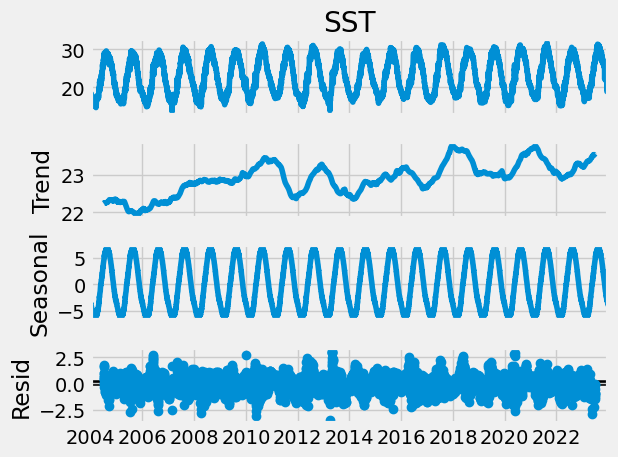

In [20]:
result1 = seasonal_decompose(df['SST'], model='additive', period=365)
result1.plot()
plt.tight_layout()
plt.show()

### Autocorrelation Function (ACF) & Partial ACF (PACF) It includes both direct and indirect correlations.

<Figure size 1200x600 with 0 Axes>

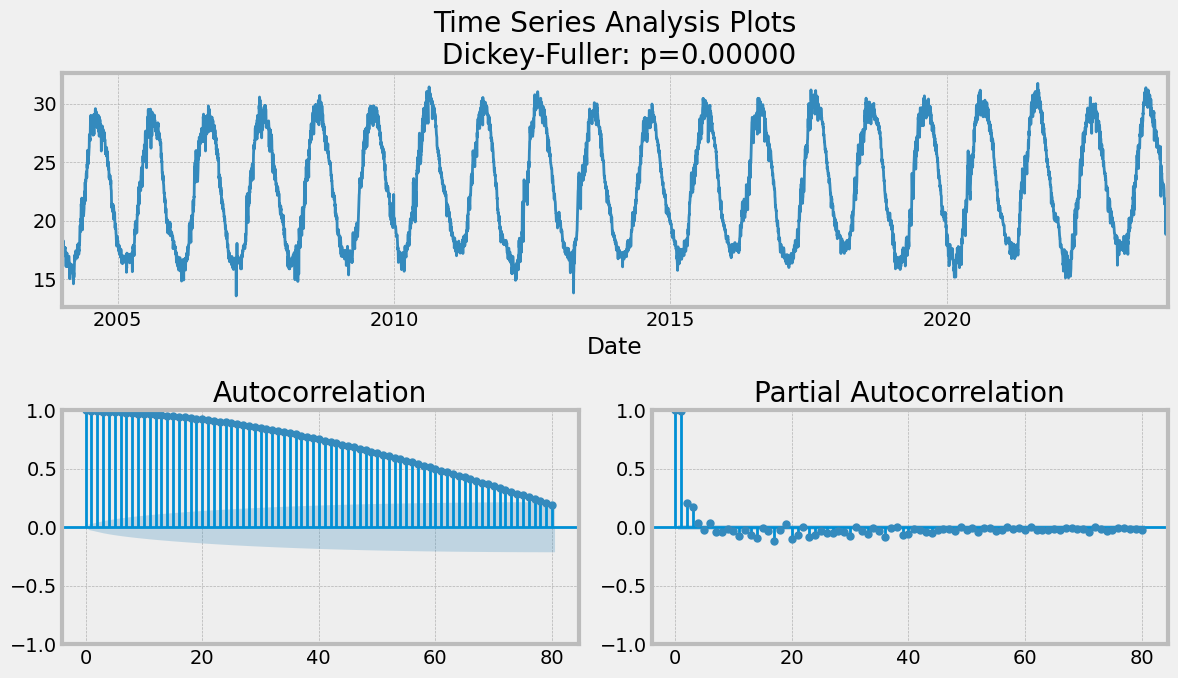

In [28]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Use your tsplot function
tsplot(df["SST"], lags=80)

# Show the plot
plt.show()


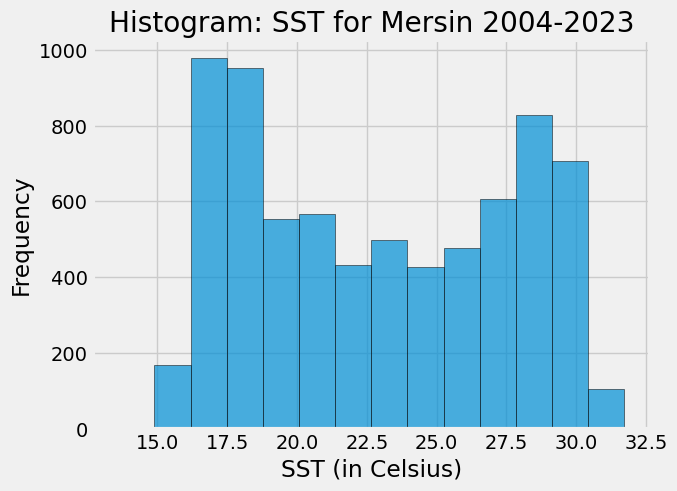

In [34]:
plt.hist(df["SST"], bins=14, edgecolor="black", alpha=0.7)

# Customize the plot
plt.xlabel("SST (in Celsius)")
plt.ylabel("Frequency")
plt.title("Histogram: SST for Mersin 2004-2023")


# Show the plot
plt.grid(True)
plt.show()

## Note: Histogram above shows Bi-modal Plot 

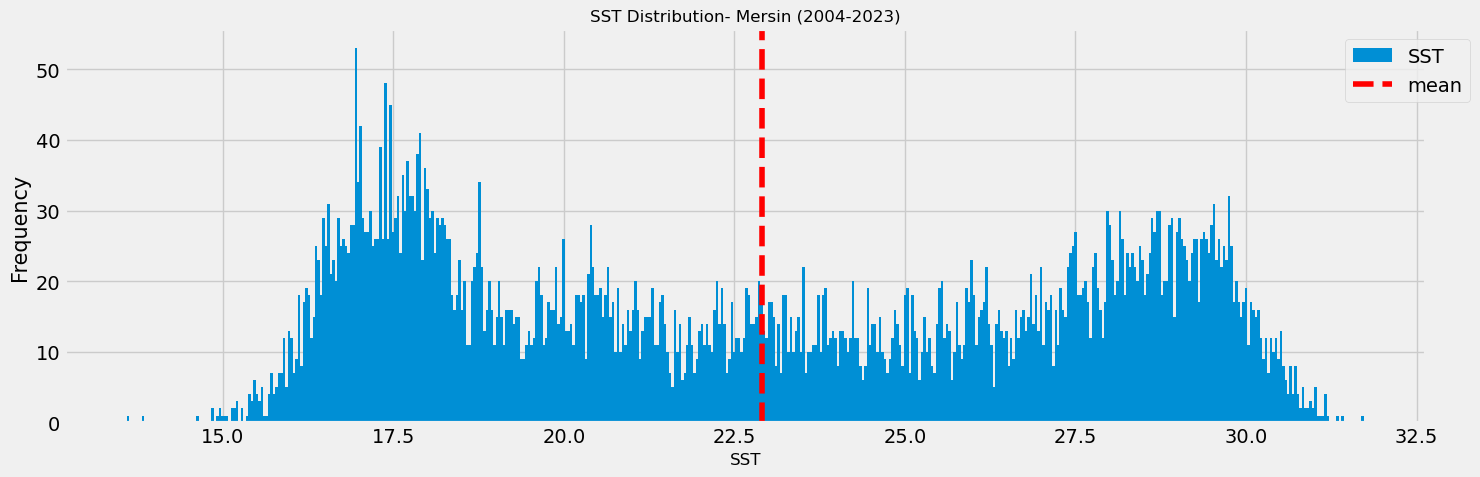

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the mean of the SST column
mean_sst = df["SST"].mean()

# Create a subplot
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the histogram
df["SST"].plot(kind='hist', bins=500, ax=ax)

# Add a vertical line for the mean
ax.axvline(x=mean_sst, color='r', linestyle='--', label='mean')

# Set titles and labels
ax.set_title('SST Distribution- Mersin (2004-2023)', fontsize=12)
ax.set_xlabel('SST', fontsize=12)
ax.set_ylabel('Frequency', fontsize=15)

# Add legend
ax.legend(bbox_to_anchor=(1.04, 1))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Train-Test (2021-2023 as Test)

In [68]:
# Use loc for date-based indexing with the correct format
y_train = series.loc["2004-01-01":"2020-12-31"]
y_test = series.loc["2021-01-01":]

# Display the results to confirm
print(y_train)
print(y_test)

Date
2004-01-01    18.336373
2004-01-02    17.548176
2004-01-03    17.247261
2004-01-04    17.504519
2004-01-05    17.448189
                ...    
2020-12-27    20.520898
2020-12-28    20.270898
2020-12-29    20.372727
2020-12-30    20.321813
2020-12-31    20.409082
Name: SST, Length: 6210, dtype: float64
Date
2021-01-01    20.236364
2021-01-02    20.306343
2021-01-03    20.188157
2021-01-04    19.895455
2021-01-05    19.859100
                ...    
2023-12-27    20.831800
2023-12-28    21.115425
2023-12-29    20.515461
2023-12-30    20.688179
2023-12-31    20.468164
Name: SST, Length: 1095, dtype: float64


# Hyper-parameter 

In [69]:
p_params = range(0, 30, 8)
q_params = range(0, 4, 1)
print("P-list", list(p_params))
print("Q-list", list(q_params))

P-list [0, 8, 16, 24]
Q-list [0, 1, 2, 3]


In [70]:
# Create dictionary to store MAEs
mae_grid = {}
# Outer loop: Iterate through possible values for `p`
for p in p_params:
    # Create key-value pair in dict. Key is `p`, value is empty list.
    mae_grid[p] = []
    # Inner loop: Iterate through possible values for `q`
    for q in q_params:
        # Combination of hyperparameters for model
        order = (p, 0, q)
        # Note start time
        start_time = time.time()
        # Train model
        model = ARIMA(y_train, order=order).fit()
        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        # Generate in-sample (training) predictions
        y_pred = model.predict()
        # Calculate training MAE
        mae = mean_absolute_error(y_train, y_pred)
        # Append MAE to list in dictionary
        mae_grid[p].append(mae)

print()
print(mae_grid)

Trained ARIMA (0, 0, 0) in 0.44 seconds.
Trained ARIMA (0, 0, 1) in 0.5 seconds.
Trained ARIMA (0, 0, 2) in 1.02 seconds.
Trained ARIMA (0, 0, 3) in 1.2 seconds.
Trained ARIMA (8, 0, 0) in 1.16 seconds.
Trained ARIMA (8, 0, 1) in 5.44 seconds.
Trained ARIMA (8, 0, 2) in 10.6 seconds.
Trained ARIMA (8, 0, 3) in 11.3 seconds.
Trained ARIMA (16, 0, 0) in 4.41 seconds.
Trained ARIMA (16, 0, 1) in 19.33 seconds.
Trained ARIMA (16, 0, 2) in 29.33 seconds.
Trained ARIMA (16, 0, 3) in 29.34 seconds.
Trained ARIMA (24, 0, 0) in 13.03 seconds.
Trained ARIMA (24, 0, 1) in 59.48 seconds.
Trained ARIMA (24, 0, 2) in 63.22 seconds.
Trained ARIMA (24, 0, 3) in 65.12 seconds.

{0: [4.18671427474547, 2.235133926990845, 1.3879797914984253, 1.0440587374322767], 8: [0.34074193646318973, 0.3405639968971627, 0.3385890214836053, 0.3318278579220211], 16: [0.33622756247399016, 0.336023769496529, 0.3343786443001768, 0.32912689149325974], 24: [0.32972128252599564, 0.3280795413146072, 0.324354769744148, 0.3254450

## Grid & heatmap for the hyper-parameter results

In [71]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

,0,8,16,24
0,4.1867,0.3407,0.3362,0.3297
1,2.2351,0.3406,0.3360,0.3281
2,1.3880,0.3386,0.3344,0.3244
3,1.0441,0.3318,0.3291,0.3254


<Axes: >

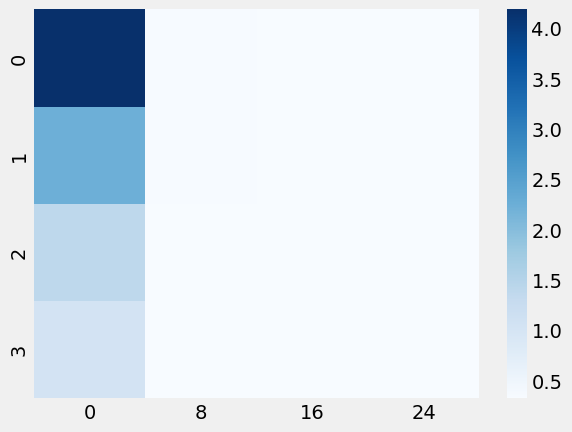

In [72]:
sns.heatmap(mae_df, cmap="Blues")

### will use 8-0-1 because we care about computational cost also as data scientist

# ARMA Plot Diagnostic
### 1) Residuals, Actual trend, ACF of residuals...

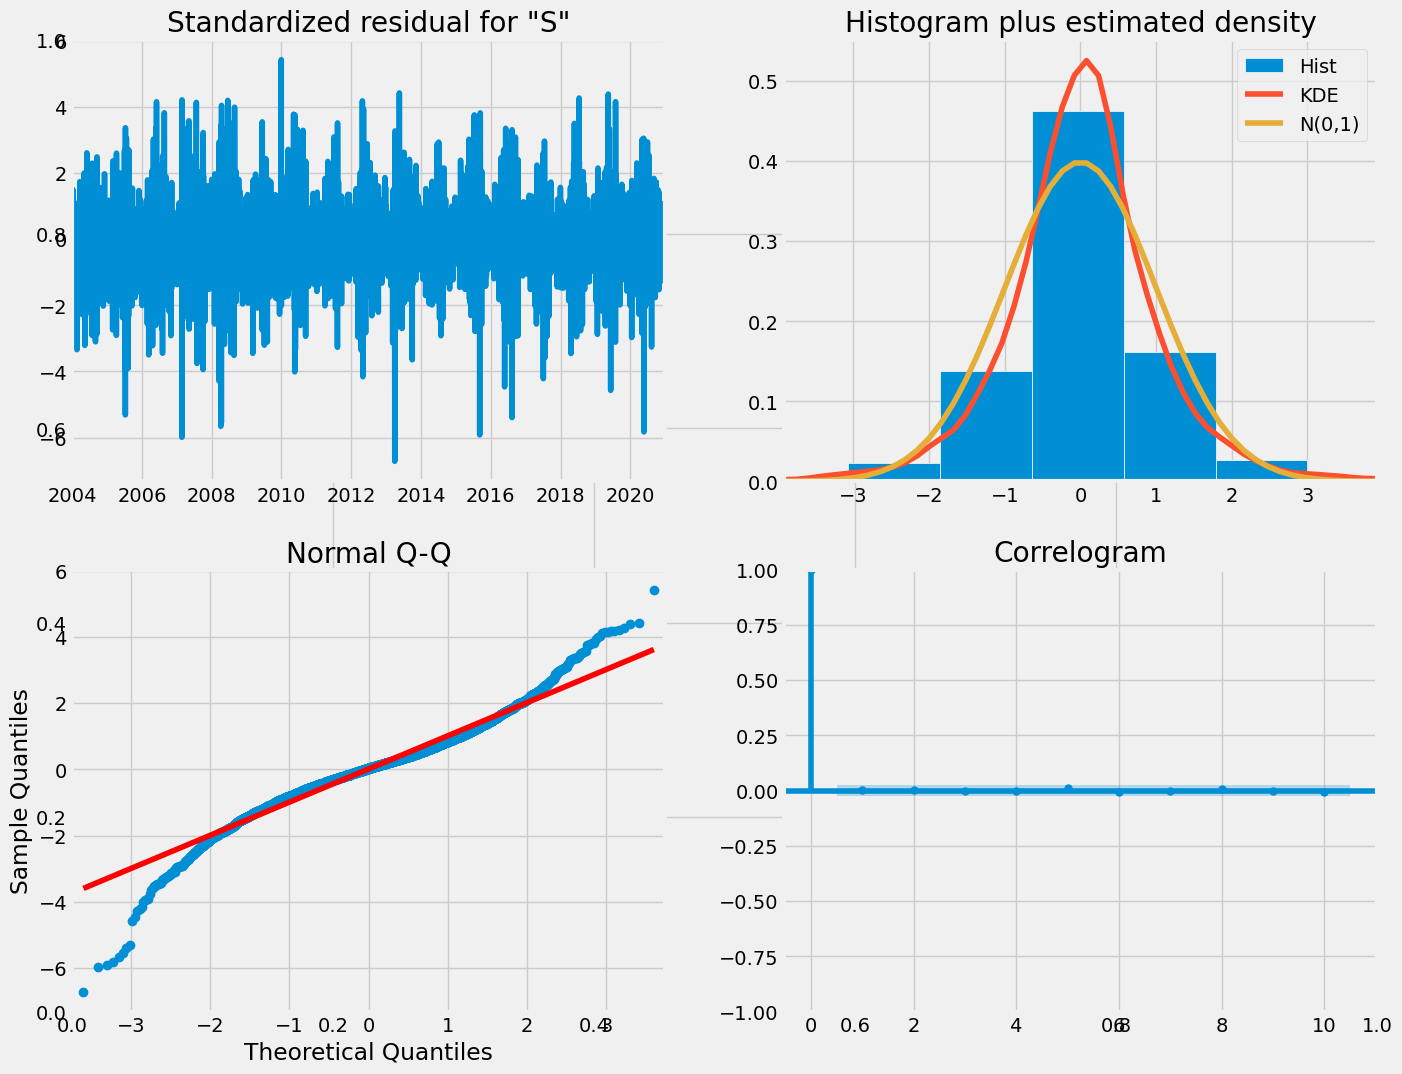

In [73]:
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig);

# Performing the Walk Forward Validation & fitting the model on the training set

In [74]:
y_pred_wfv = pd.Series(dtype=float)
history = y_train.copy()

for i in range(len(y_test)):
    try:
        # Fit the ARIMA model with a simpler order
        model = ARIMA(history, order=(8, 0, 0)).fit()
        next_pred = model.forecast()
        
        # Append the prediction to the predictions Series
        y_pred_wfv = pd.concat([y_pred_wfv, next_pred])
        
        # Update the history with the actual value
        history = pd.concat([history, y_test[next_pred.index]])
    except np.linalg.LinAlgError as e:
        print(f"LinAlgError encountered at step {i}: {e}. Skipping this step.")
        continue
    except Exception as e:
        print(f"Unexpected error at step {i}: {e}. Skipping this step.")
        continue

# Display the predictions
print(y_pred_wfv)

2021-01-01    20.400697
2021-01-02    20.279583
2021-01-03    20.302516
2021-01-04    20.223729
2021-01-05    19.995568
                ...    
2023-12-27    21.262223
2023-12-28    20.956098
2023-12-29    21.146618
2023-12-30    20.628467
2023-12-31    20.757841
Freq: D, Length: 1095, dtype: float64


# Evaluation Metrics (MAE / MSE / R^2) on the test set

In [75]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Calculate MAE
test_mae = mean_absolute_error(y_test, y_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))

# Calculate MSE
test_mse = mean_squared_error(y_test, y_pred_wfv)
print("Test MSE (walk forward validation):", round(test_mse, 2))

# Calculate R-squared
test_r2 = r2_score(y_test, y_pred_wfv)
print("Test R² (walk forward validation):", round(test_r2 * 100, 2), "%")

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

test_mape = mean_absolute_percentage_error(y_test, y_pred_wfv)
print("Test MAPE (walk forward validation):", round(test_mape, 2), "%")

Test MAE (walk forward validation): 0.35
Test MSE (walk forward validation): 0.24
Test R² (walk forward validation): 98.9 %
Test MAPE (walk forward validation): 1.52 %


# Plot of the test results

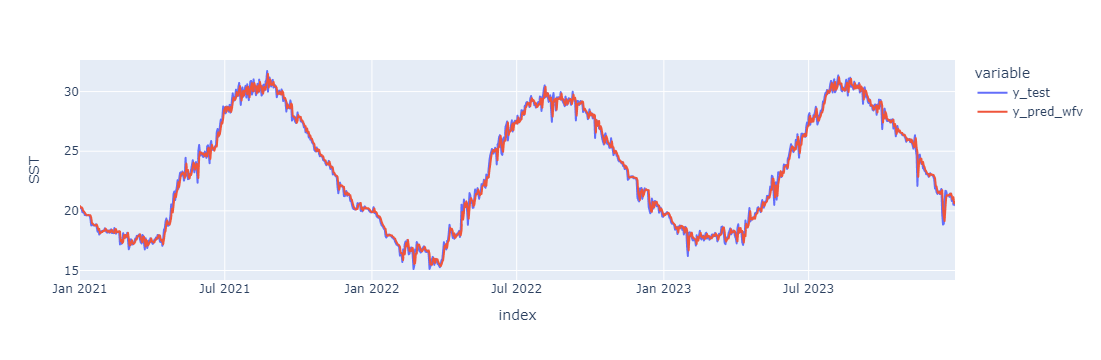

In [76]:
# Create a DataFrame for predictions and actual values
df_predictions = pd.DataFrame({"y_test": y_test, "y_pred_wfv": y_pred_wfv})

fig = px.line(df_predictions, labels={"value":"SST"})
fig.show()

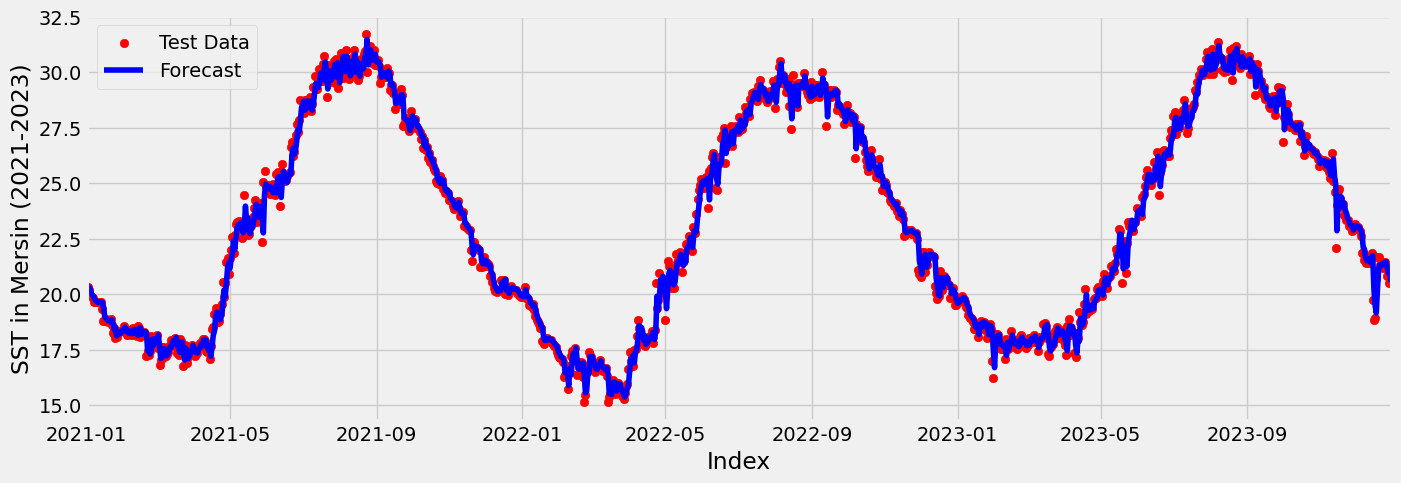

In [77]:
# Plot the forecast with the actuals
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the test data
ax.scatter(df_predictions.index, df_predictions['y_test'], color='r', label='Test Data')

# Plot the forecasted data
ax.plot(df_predictions.index, df_predictions['y_pred_wfv'], color='b', label='Forecast')

# Set the x-axis limits to match the test data range
ax.set_xlim(df_predictions.index.min(), df_predictions.index.max())

# Add labels and legend
plt.xlabel("Index")
plt.ylabel("SST in Mersin (2021-2023)")
plt.legend(['Test Data', 'Forecast'])

# Show the plot
plt.show()

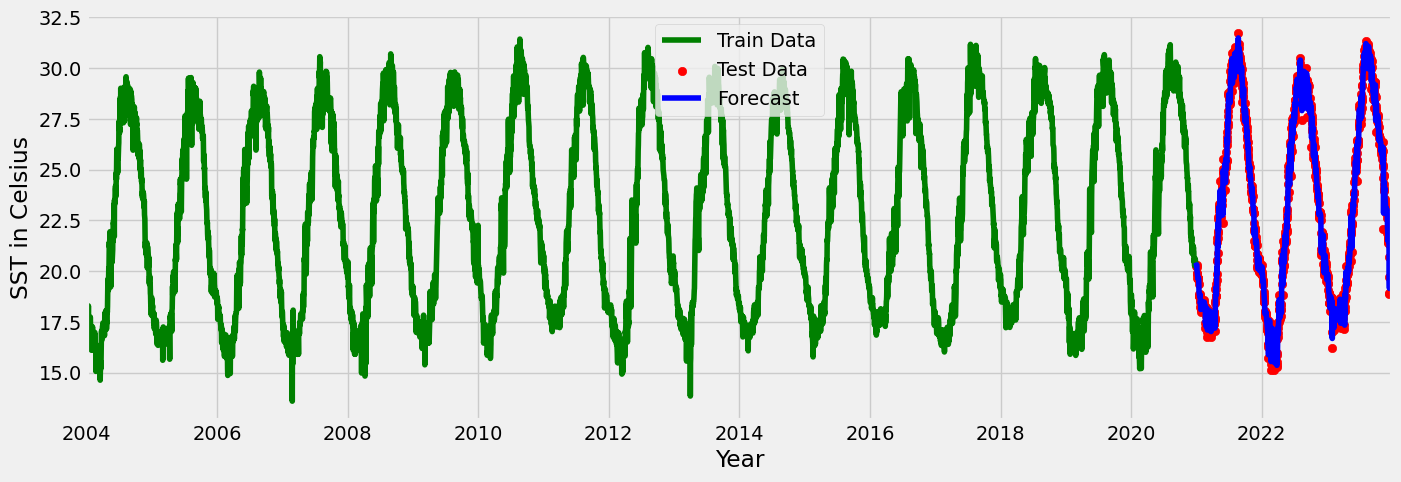

In [78]:
# Plot the train, test, and forecasted data
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the training data
ax.plot(y_train.index, y_train, color='g', label='Train Data')

# Plot the test data
ax.scatter(y_test.index, y_test, color='r', label='Test Data')

# Plot the forecasted data
ax.plot(df_predictions.index, df_predictions['y_pred_wfv'], color='b', label='Forecast')

# Set the x-axis limits to match the full data range
ax.set_xlim(min(y_train.index.min(), y_test.index.min()), y_test.index.max())

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("SST in Celsius")
plt.legend(['Train Data', 'Test Data', 'Forecast'])

# Show the plot
plt.show()

# Save the results

In [84]:
df

,SST
Date,
2004-01-01,18.336373
2004-01-02,17.548176
2004-01-03,17.247261
2004-01-04,17.504519
2004-01-05,17.448189
...,...
2023-12-27,20.831800
2023-12-28,21.115425
2023-12-29,20.515461


In [87]:
df_predictions['y_pred_wfv']

2021-01-01    20.400697
2021-01-02    20.279583
2021-01-03    20.302516
2021-01-04    20.223729
2021-01-05    19.995568
                ...    
2023-12-27    21.262223
2023-12-28    20.956098
2023-12-29    21.146618
2023-12-30    20.628467
2023-12-31    20.757841
Name: y_pred_wfv, Length: 1095, dtype: float64

In [90]:
merged_df = df.merge(df_predictions[['y_pred_wfv']], left_index=True, right_index=True, how='outer')
merged_df.to_csv(r"C:AR-Mersin.csv", index=True)

# Forecast SST until 2025 in Mersin

2024-01-01    20.541420
2024-01-02    20.517082
2024-01-03    20.538635
2024-01-04    20.516164
2024-01-05    20.517665
                ...    
2026-12-27    22.792281
2026-12-28    22.792586
2026-12-29    22.792890
2026-12-30    22.793193
2026-12-31    22.793495
Freq: D, Name: predicted_mean, Length: 1096, dtype: float64


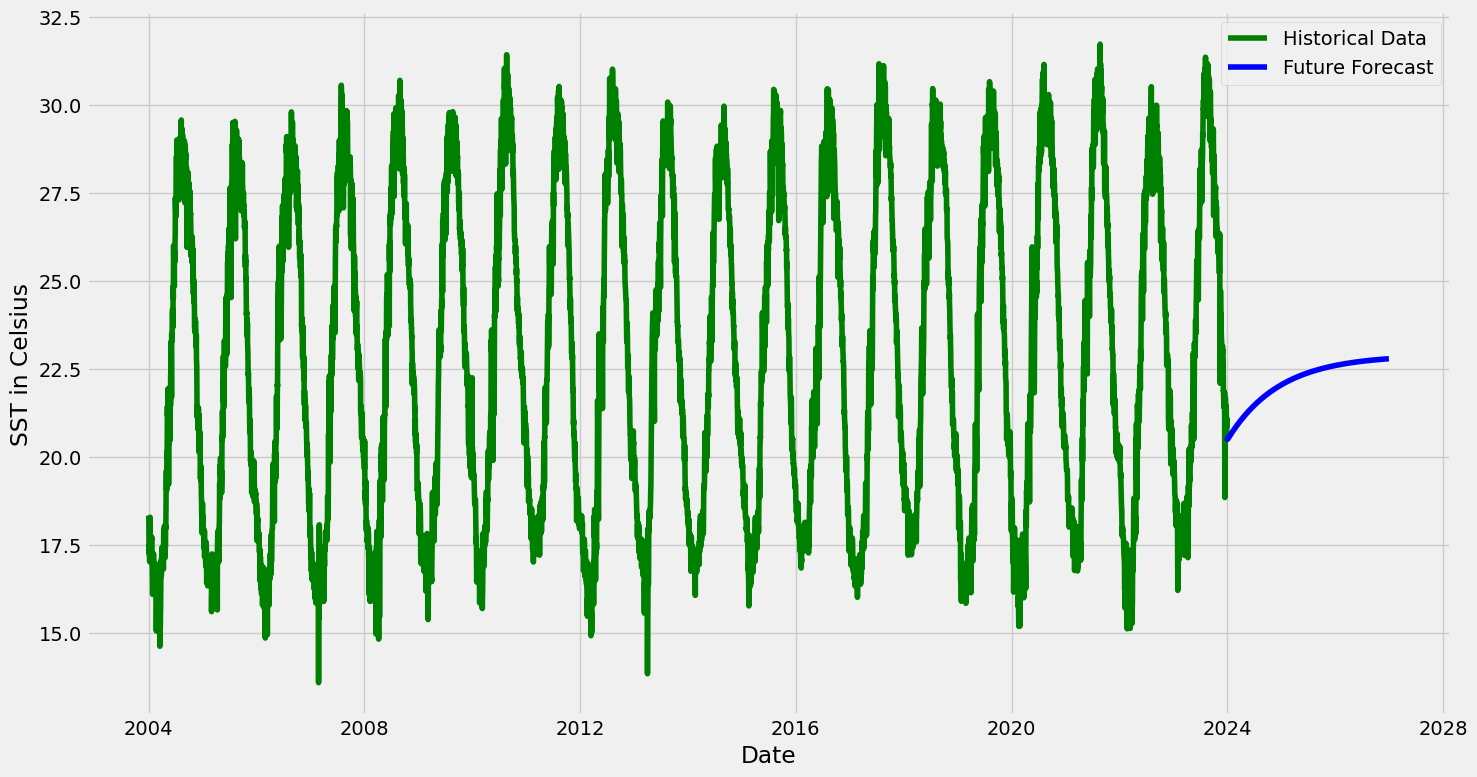

In [79]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'series' is your complete time series data with a DateTime index
# Combine train and test data
history = pd.concat([y_train, y_test])

# Fit the ARIMA model on the entire dataset
model = ARIMA(history, order=(8, 0, 0)).fit()

# Forecast the next 1096 days
forecast_steps = 1096
future_forecast = model.forecast(steps=forecast_steps)

# Create a date range for the forecast
future_dates = pd.date_range(start='2024-01-01', periods=forecast_steps, freq='D')

# Combine the forecast with the future dates
future_forecast_series = pd.Series(future_forecast, index=future_dates)

# Display the future forecast
print(future_forecast_series)

# Plot the results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

# Plot the historical data
ax.plot(history.index, history, color='g', label='Historical Data')

# Plot the future forecast
ax.plot(future_forecast_series.index, future_forecast_series, color='b', label='Future Forecast')

# Set the x-axis to display date
ax.set_xlabel("Date")
ax.set_ylabel("SST in Celsius")
plt.legend()
plt.tight_layout()
plt.show()

# This code will help visualize how the prediction error changes over different horizons

# "Time Series Modelling for SST by Machine Learning"
# Abdallah I. J. Dwikat - Computer Engineering - Istanbul Aydin University
## Email: adweikat12@gmail.com 
## Linkedin: Abdallah Dwikat  www.linkedin.com/in/
abdallah-dwikat-04095927b

## Note: Please cite the paper "Time Series Modelling for SST by Machine Learning, A.DWIKAT, Z.ASLAN" for any usage.

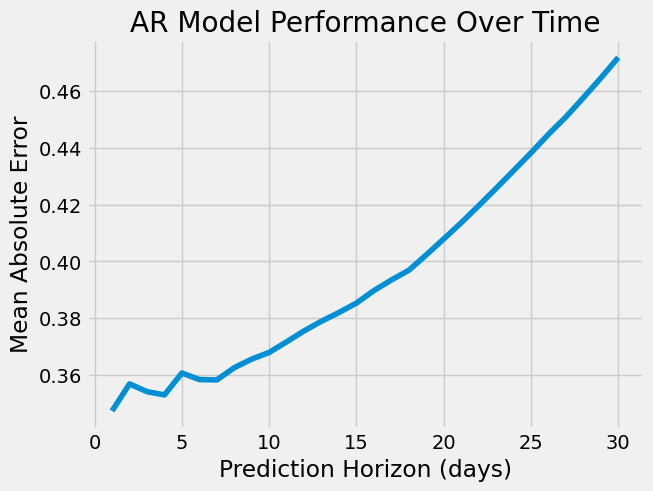

In [82]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error

# Define the function to evaluate model performance
def evaluate_model(history, test, max_horizon, lags):
    errors = []
    for horizon in range(1, max_horizon + 1):
        predictions = []
        for i in range(len(test) - horizon + 1):
            model = AutoReg(history, lags=lags).fit()
            yhat = model.predict(start=len(history), end=len(history) + horizon - 1)
            predictions.append(yhat[-1])
            history.append(test[i])
        error = mean_absolute_error(test[:len(predictions)], predictions)
        errors.append(error)
        history = history[:-len(predictions)]  # Reset history
    return errors

# Evaluate the model
max_horizon = 30  # Evaluate up to 30 days
errors = evaluate_model(list(y_train), list(y_test), max_horizon, 8)

# Plot the errors
import matplotlib.pyplot as plt

plt.plot(range(1, max_horizon + 1), errors)
plt.xlabel('Prediction Horizon (days)')
plt.ylabel('Mean Absolute Error')
plt.title('AR Model Performance Over Time')
plt.show()

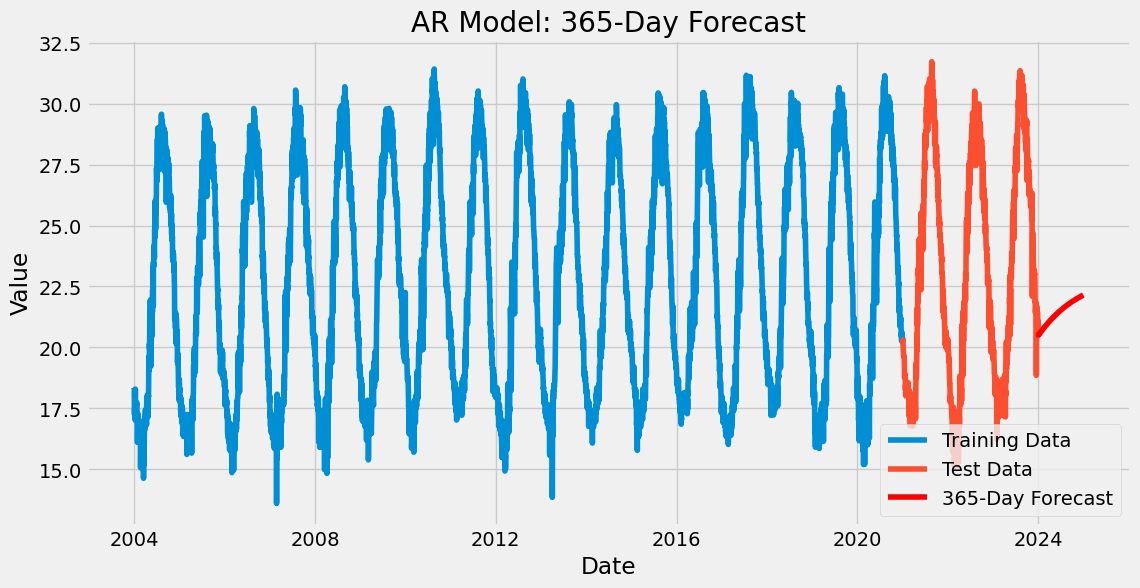

             forecast
2024-01-01  20.542067
2024-01-02  20.518147
2024-01-03  20.540170
2024-01-04  20.518007
2024-01-05  20.519981
...               ...
2024-12-26  22.137698
2024-12-27  22.140320
2024-12-28  22.142935
2024-12-29  22.145542
2024-12-30  22.148141

[365 rows x 1 columns]


In [83]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Assuming y_train and y_test are your original train and test sets
# Combine train and test data for the final model
full_data = list(y_train) + list(y_test)

# Define the number of lags (you used 8 in your original code)
lags = 8

# Fit the AR model on the full data
model = AutoReg(full_data, lags=lags).fit()

# Forecast the next 365 days
forecast_horizon = 365
forecast = model.forecast(steps=forecast_horizon)

# Create a date range for the forecast (assuming your data is daily)
last_date = pd.to_datetime(y_test.index[-1])  # Assuming y_test has a datetime index
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_horizon)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Training Data')
plt.plot(y_test.index, y_test, label='Test Data')
plt.plot(forecast_dates, forecast, label='365-Day Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('AR Model: 365-Day Forecast')
plt.legend()
plt.show()

# If you want to save the forecast to a DataFrame
forecast_df = pd.DataFrame({'forecast': forecast}, index=forecast_dates)
print(forecast_df)